## 1. Import Packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.ndimage import zoom
## pydot and graphviz 

## 2. Import datasets

In [3]:
path_dataset = np.load('../Datasets/pathmnist.npz')
print("Get object keys", pd.DataFrame(path_dataset).head())

Get object keys               0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


## 3. Get images and labels

train_images dimensions (89996, 28, 28, 3)
val_images dimensions (10004, 28, 28, 3)
test_images dimensions (7180, 28, 28, 3)
train_labels dimensions (89996, 1)
val_labels dimensions (10004, 1)
test_labels dimensions (7180, 1)
10.407128930091858
10.566025227308273
11.511622369289398
11.557180434465408
8.895950764417648
13.536156713962555
8.762611448764801
10.446019470691681
14.317302405834198
10.405837744474411
10.565773397684097
11.515393853187561
11.555378139019012
8.896441757678986
13.534586131572723
8.766493201255798
10.445822030305862
14.314274489879608
18.63509714603424
11.796657741069794
4.721448570489883
8.830083906650543
14.415042102336884
8.245125412940979
10.320334136486053
5.863509699702263
17.17270165681839


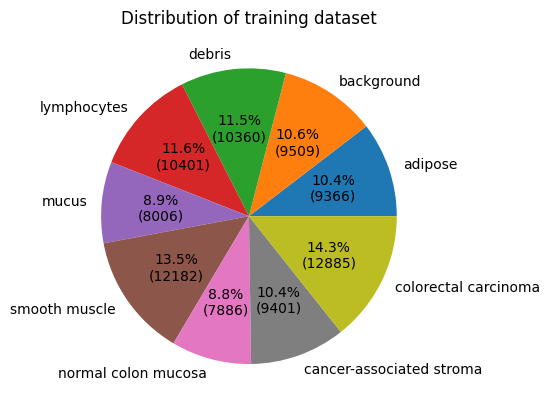

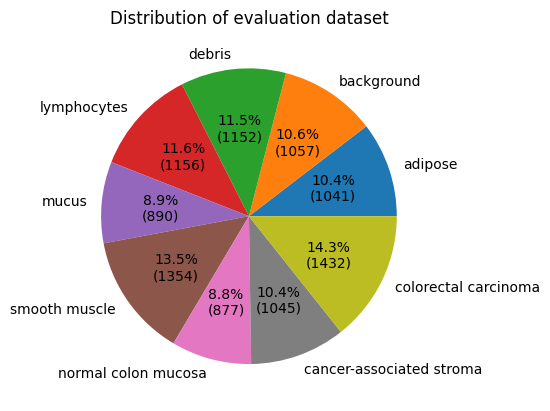

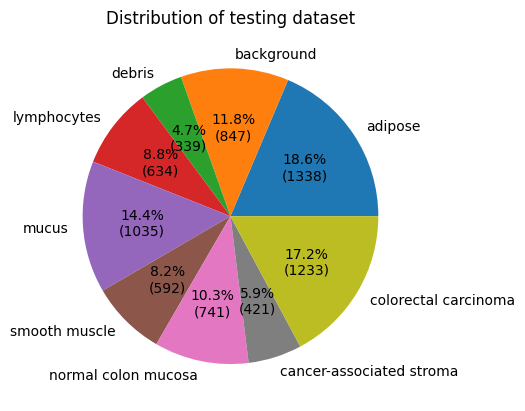

In [4]:
train_images = path_dataset['train_images']
print("train_images dimensions", np.shape(train_images))
val_images = path_dataset['val_images']
print("val_images dimensions", np.shape(val_images))
test_images = path_dataset['test_images']
print("test_images dimensions", np.shape(test_images))
train_labels = path_dataset['train_labels']
print("train_labels dimensions", np.shape(train_labels))
val_labels = path_dataset['val_labels']
print("val_labels dimensions", np.shape(val_labels))
test_labels = path_dataset['test_labels']
print("test_labels dimensions", np.shape(test_labels))

def getClassDistribution(label_array, title): 
  class_count = [0,0,0,0,0,0,0,0,0]
  for i in label_array:
      class_count[i[0]] += 1
  def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)
  total =  sum(class_count)
  fig = plt.figure()
  plt.pie(class_count, labels=['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle','normal colon mucosa', 'cancer-associated stroma', 'colorectal carcinoma'], autopct=my_fmt) # colorectal adenocarcinoma epithelium
  plt.title(title)


getClassDistribution(train_labels, "Distribution of training dataset")
getClassDistribution(val_labels, "Distribution of evaluation dataset")
getClassDistribution(test_labels, "Distribution of testing dataset")

## 4. Display images of each class from the dataset

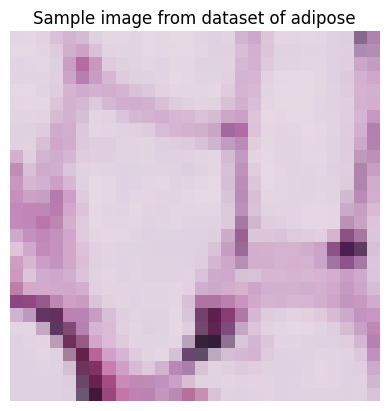

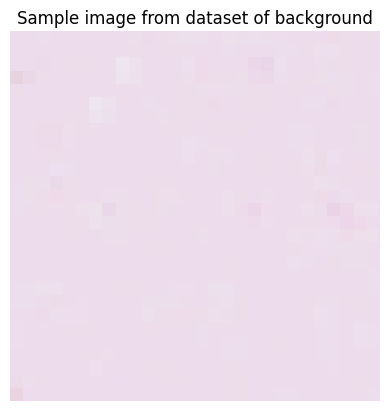

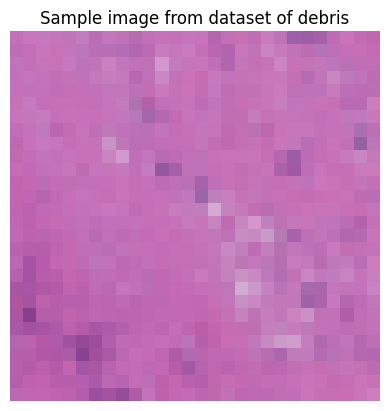

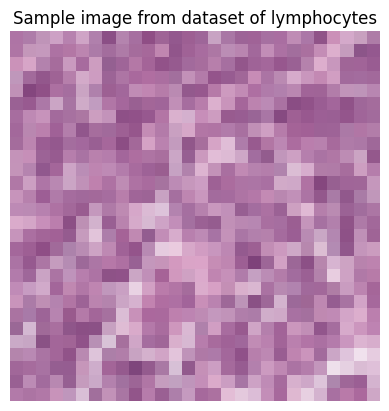

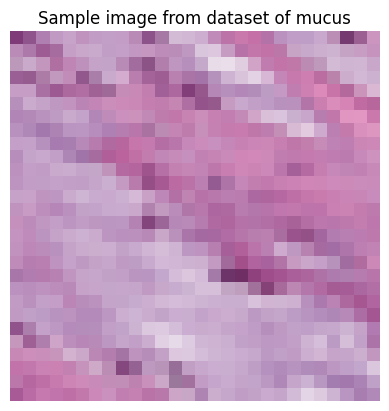

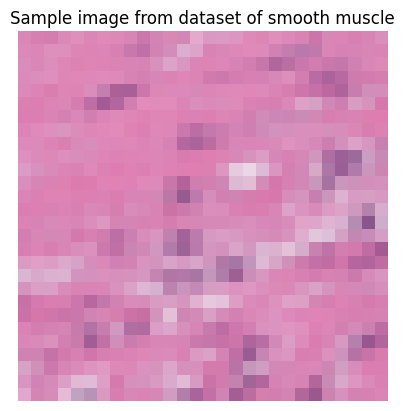

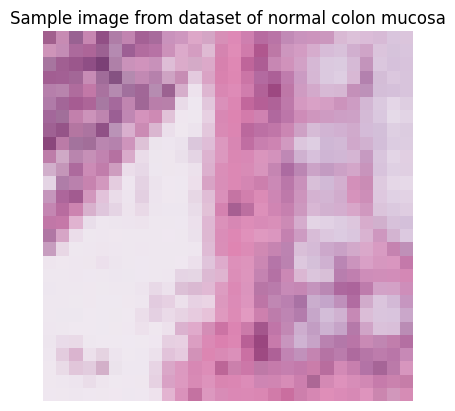

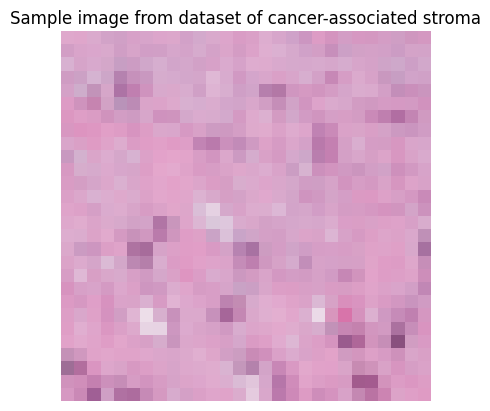

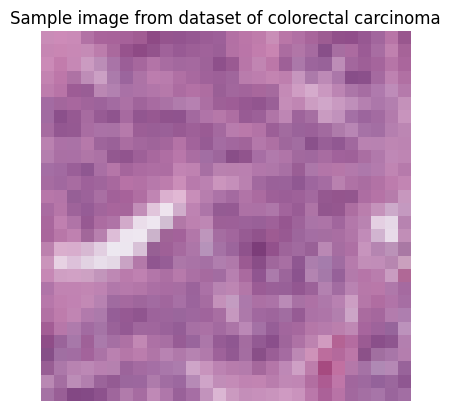

In [5]:
indexes = [0,0,0,0,0,0,0,0,0]
i = 0
while 0 in indexes:
  if indexes[train_labels[i][0]] == 0:
    indexes[train_labels[i][0]] = i
  i += 1

classes = ['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle','normal colon mucosa', 'cancer-associated stroma', 'colorectal carcinoma']

for i in range(len(classes)):
  sample_image = train_images[indexes[i]]
  plt.imshow(sample_image, cmap="gray")
  plt.axis("off")
  plt.title(f"Sample image from dataset of {classes[i]}")
  plt.show()

## 5. Convert image data from integers to floating point numbers

In [6]:
train_images = train_images / 255.0
print("New dataset format using floating point numbers", train_images)
val_images = val_images / 255.0

test_images = test_images / 255.0

New dataset format using floating point numbers [[[[0.8627451  0.81568627 0.89019608]
   [0.85882353 0.81176471 0.89019608]
   [0.8627451  0.81176471 0.89019608]
   ...
   [0.8627451  0.81568627 0.89019608]
   [0.85882353 0.81176471 0.89019608]
   [0.86666667 0.81568627 0.89019608]]

  [[0.85490196 0.80784314 0.88627451]
   [0.8627451  0.81176471 0.88627451]
   [0.85882353 0.80784314 0.88627451]
   ...
   [0.77254902 0.69411765 0.79215686]
   [0.75294118 0.6745098  0.77254902]
   [0.74509804 0.65882353 0.76470588]]

  [[0.8627451  0.81568627 0.88627451]
   [0.8627451  0.81176471 0.88627451]
   [0.85882353 0.80392157 0.88235294]
   ...
   [0.81568627 0.74901961 0.83529412]
   [0.81176471 0.75294118 0.83529412]
   [0.81960784 0.76078431 0.84705882]]

  ...

  [[0.85490196 0.80392157 0.88235294]
   [0.85098039 0.78823529 0.87058824]
   [0.86666667 0.81568627 0.89019608]
   ...
   [0.86666667 0.81568627 0.89019608]
   [0.8627451  0.81568627 0.89019608]
   [0.86666667 0.81960784 0.89019608]

## 6. Create a neural network (NN) model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2352)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               301184    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 9)                 297       
                                                                 
Total params: 305609 (1.17 MB)
Trainable params: 30560

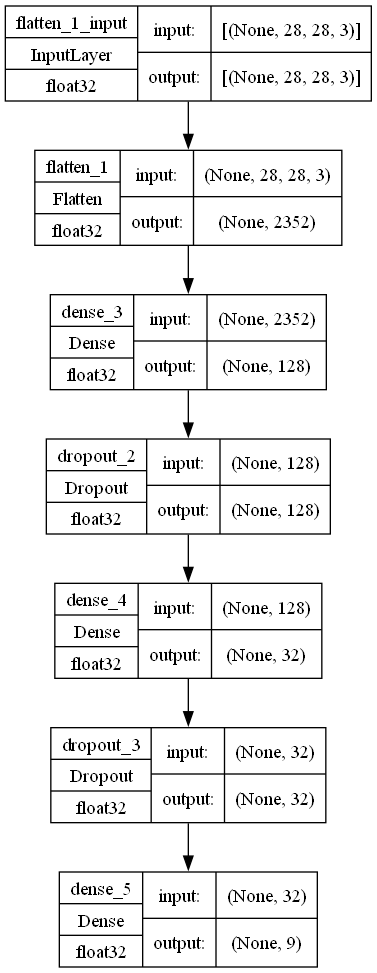

In [12]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(9 , activation ='softmax')
])

NN_model.summary()

tf.keras.utils.plot_model(NN_model, to_file='NN_model.png', show_shapes=True, 
    show_dtype=True)

## 7. Compile NN model

In [13]:
NN_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

NN_model.compile(optimizer=NN_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 8. Train NN Model

In [14]:

history = NN_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=100, epochs=40)

Epoch 1/40
900/900 [==============================] - 6s 6ms/step - loss: 2.1118 - accuracy: 0.1905 - val_loss: 1.9679 - val_accuracy: 0.2512
Epoch 2/40
900/900 [==============================] - 5s 5ms/step - loss: 1.9717 - accuracy: 0.2320 - val_loss: 1.8655 - val_accuracy: 0.2729
Epoch 3/40
900/900 [==============================] - 5s 6ms/step - loss: 1.8989 - accuracy: 0.2502 - val_loss: 1.7827 - val_accuracy: 0.2827
Epoch 4/40
900/900 [==============================] - 4s 5ms/step - loss: 1.8367 - accuracy: 0.2825 - val_loss: 1.7145 - val_accuracy: 0.3358
Epoch 5/40
900/900 [==============================] - 5s 5ms/step - loss: 1.7871 - accuracy: 0.3096 - val_loss: 1.6722 - val_accuracy: 0.3722
Epoch 6/40
900/900 [==============================] - 5s 5ms/step - loss: 1.7483 - accuracy: 0.3285 - val_loss: 1.6535 - val_accuracy: 0.3974
Epoch 7/40
900/900 [==============================] - 5s 5ms/step - loss: 1.7147 - accuracy: 0.3417 - val_loss: 1.6176 - val_accuracy: 0.3890
Epoch 

## 9. Plot NN training and evaluation results

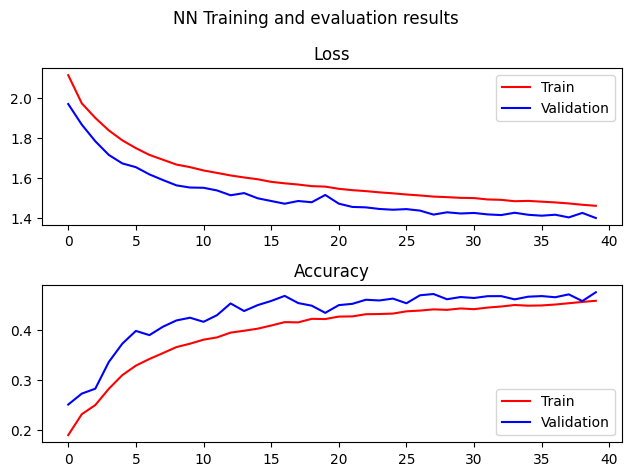

In [15]:
# Loss plot
figure, axis = plt.subplots(2)
line1, = axis[0].plot(history.history['loss'], 'r')
line2, = axis[0].plot(history.history['val_loss'], 'b')
axis[0].legend(['Train','Validation'])
axis[0].set_title("Loss")

# Accuracy plot
line3, = axis[1].plot(history.history['accuracy'], 'r')
line4, = axis[1].plot(history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Validation'])
axis[1].set_title("Accuracy")
figure.suptitle("NN Training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 10. Run NN model with test data and plot confusion matrix

225/225 [==============================] - 1s 2ms/step
Accuracy: 61.32311977715877


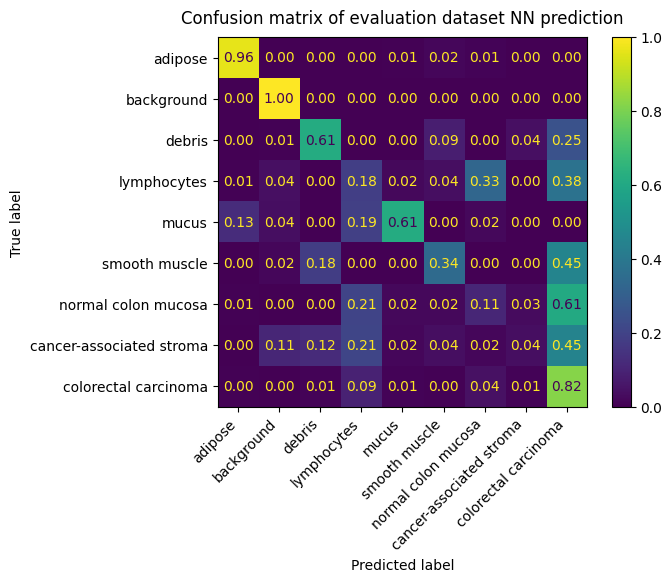

In [16]:
NN_test_prediction = NN_model.predict(test_images)

NN_test_prediction = np.argmax(NN_test_prediction, axis=1)

total = 0
correct = 0
for i in range(len(NN_test_prediction)):
  if NN_test_prediction[i] == test_labels[i][0]:
    correct += 1
  total += 1

print("Accuracy:", correct * 100 / total)

result = confusion_matrix(test_labels, NN_test_prediction , normalize='true')

labels = ['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle','normal colon mucosa', 'cancer-associated stroma', 'colorectal carcinoma']
cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = labels)

cm_display.plot(values_format = '.2f')
plt.title("Confusion matrix of evaluation dataset NN prediction", pad=10)
plt.xticks(rotation=45, ha='right')
plt.show()

## 11. Save NN model

In [ ]:
#NN_model.save("NN_model")


## 12. Create a convolutional neural network (CNN) model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        9248      


                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 20, 20, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 12800)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               1638528   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 9)                 297       
          

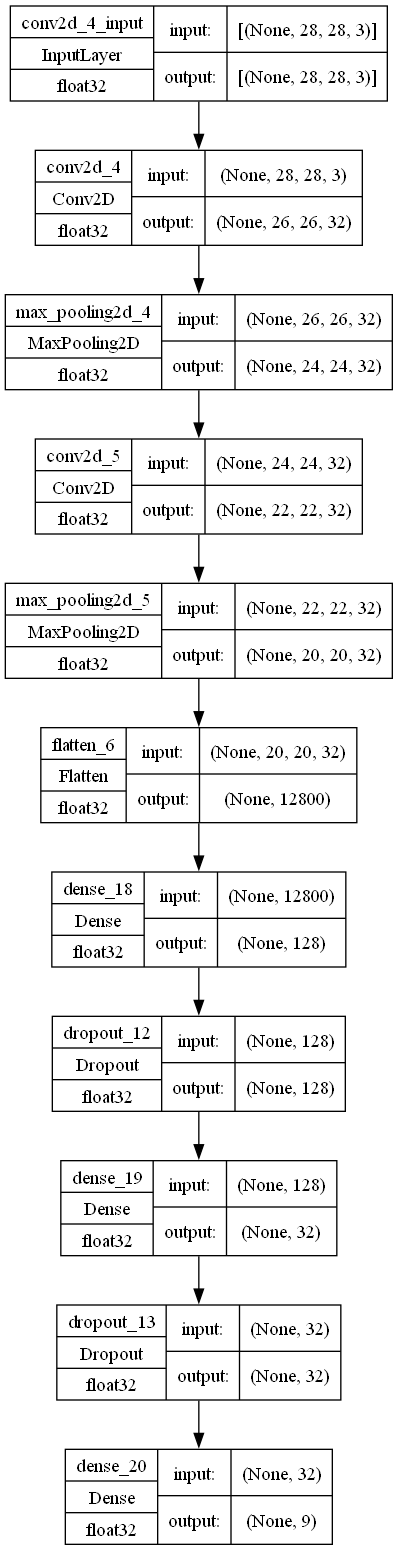

In [80]:
CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size =(3, 3), strides =1, activation ='relu', input_shape = (28,28,3)), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Conv2D(32, kernel_size =(3, 3), strides =1, activation ='relu'), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(9 , activation ='softmax')
])


CNN_model.summary()

tf.keras.utils.plot_model(CNN_model, to_file='CNN_model.png', show_shapes=True, 
    show_dtype=True)

## 13. Complie CNN model

In [81]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 14. Train CNN model

In [82]:
CNN_history = CNN_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=40)

Epoch 1/40
1800/1800 [==============================] - 55s 30ms/step - loss: 2.0736 - accuracy: 0.2086 - val_loss: 1.8093 - val_accuracy: 0.3092
Epoch 2/40
1800/1800 [==============================] - 63s 35ms/step - loss: 1.8075 - accuracy: 0.3056 - val_loss: 1.7087 - val_accuracy: 0.3252
Epoch 3/40
1800/1800 [==============================] - 62s 34ms/step - loss: 1.7452 - accuracy: 0.3203 - val_loss: 1.6745 - val_accuracy: 0.3343
Epoch 4/40
1800/1800 [==============================] - 61s 34ms/step - loss: 1.7156 - accuracy: 0.3290 - val_loss: 1.6665 - val_accuracy: 0.3315
Epoch 5/40
1800/1800 [==============================] - 59s 33ms/step - loss: 1.6902 - accuracy: 0.3382 - val_loss: 1.6367 - val_accuracy: 0.3616
Epoch 6/40
1800/1800 [==============================] - 58s 32ms/step - loss: 1.6664 - accuracy: 0.3481 - val_loss: 1.6112 - val_accuracy: 0.3632
Epoch 7/40
1800/1800 [==============================] - 58s 32ms/step - loss: 1.6394 - accuracy: 0.3550 - val_loss: 1.5745 -

## 15. Plot CNN training and evaluation results

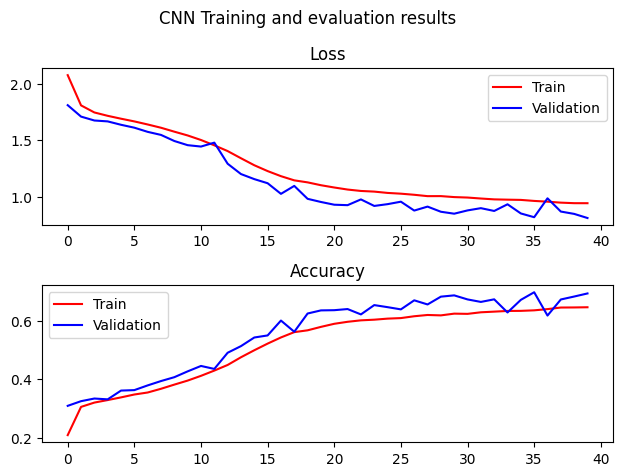

In [83]:
# Loss plot
figure, axis = plt.subplots(2)
line1, = axis[0].plot(CNN_history.history['loss'], 'r')
line2, = axis[0].plot(CNN_history.history['val_loss'], 'b')
axis[0].legend(['Train','Validation'])
axis[0].set_title("Loss")

# Accuracy plot
line3, = axis[1].plot(CNN_history.history['accuracy'], 'r')
line4, = axis[1].plot(CNN_history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Validation'])
axis[1].set_title("Accuracy")
figure.suptitle("CNN Training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 16. Run CNN model with test data and plot confusion matrix

225/225 [==============================] - 1s 6ms/step
Accuracy: 74.27576601671309


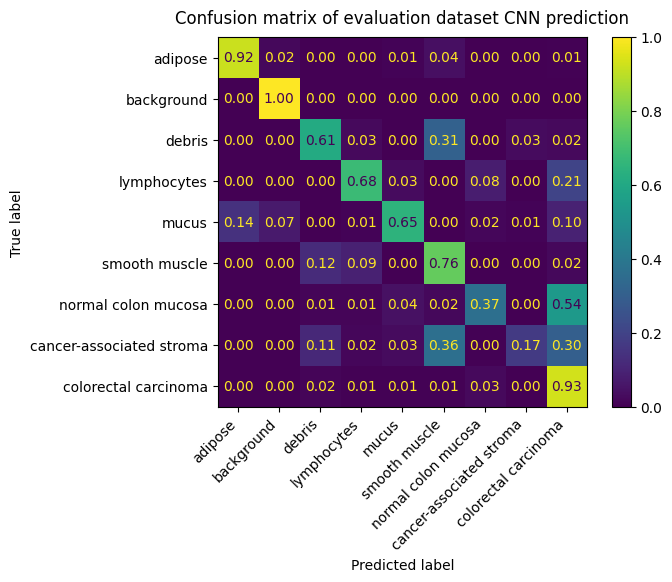

In [90]:
CNN_test_prediction = CNN_model.predict(test_images)

CNN_test_prediction = np.argmax(CNN_test_prediction, axis=1)

total = 0
correct = 0
for i in range(len(CNN_test_prediction)):
  if CNN_test_prediction[i] == test_labels[i][0]:
    correct += 1
  total += 1

print("Accuracy:", correct * 100 / total)

result = confusion_matrix(test_labels, CNN_test_prediction , normalize='true')

labels = ['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle','normal colon mucosa', 'cancer-associated stroma', 'colorectal carcinoma']
cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = labels)

cm_display.plot(values_format = '.2f')
plt.title("Confusion matrix of evaluation dataset CNN prediction", pad=10)
plt.xticks(rotation=45, ha='right')
plt.show()

## 17. Save CNN model

In [91]:
#CNN_model.save("CNN_model")

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets
